## Machine Learning II Homework

In this homework, we're going to compare the results of an SVN classifier with those of a Gaussian Naive Bayes classifier on the same data set.

### First, we'll make the data set.

In [1]:
from sklearn.datasets import make_blobs

In [27]:
this_seed = 11 # Set the seed so we can play with it
# Create two 2D blobs of data
X, y = make_blobs(n_samples=300, centers=2, 
                  random_state=this_seed, cluster_std=3.14)

Now, let's take a look at it to see what we're dealing with.

In [28]:
from matplotlib import pyplot as plt

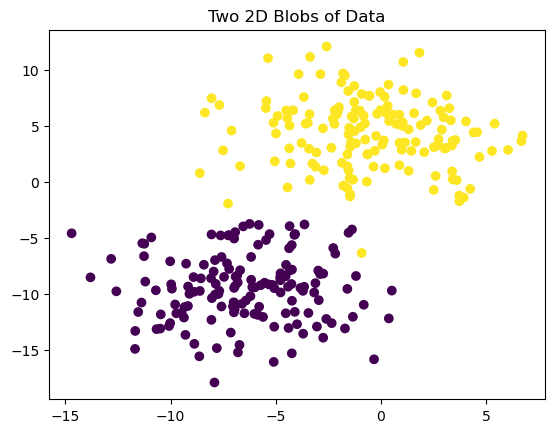

In [30]:
# Plot the blobs of data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Two 2D Blobs of Data")
plt.show()

Clearly, there is overlap between the categories, so there are bound to be classification mistakes. That's life. But let's see how well the SVN and GNB handle them.

---

First, split the data into training and test subsets. Set a `random_state` seed for reproducibility. We'll use the exact same split for both classifiers to make the comparison fair. Make it a 70/30 training/test split.  (Don't forget to import the needed module.)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

___

### Classify the data using an SVM classifier

In [33]:
from sklearn.svm import SVC

# Create a Support Vector Machine (SVM) classifier and train it on the training data
svm = SVC(kernel='linear')   # make a linear SVM
svm.fit(X_train, y_train)    # train the model
y_pred = svm.predict(X_test) # Make predictions on the test data

---

### Classify the data using an GNB classifier

In [36]:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() # Create a Naive Bayes classifier
gnb.fit(X_train, y_train) # and train it on the PCA-transformed training data
y_pred = gnb.predict(X_test) # Make predictions on the PCA-transformed testing data

---

### Look at the confusion matrixes for the two classifiers

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Compute and print the svm confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print(conf_matrix_svm)

[[45  0]
 [ 0 45]]


In [ ]:
# Compute and print the gnb confusion matrix
conf_matrix_gnb = confusion_matrix(y_test, y_pred)
print(conf_matrix_gnb)

[[45  0]
 [ 0 45]]
